## QUESTION1, part-5: Implement Linear Regression Model to Predict Chances of Admit

### <font color = "blue"> Import Required Modules

In [32]:
import numpy as np
import sys
import math
from tabulate import tabulate
import pprint
import operator
import ipdb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log
from sklearn.model_selection import KFold 

### <font color = "blue"> Utility to load and clean dataset

In [203]:
def load_preprocess_data(path):
    dataset = pd.read_csv(path)
    dataset.drop(dataset.columns[[0]], axis=1, inplace=True)
    for i in dataset.columns[:-2]:
        dataset[i] = (dataset[i] - dataset[i].mean())/dataset[i].std()
    dataset.insert(0, 'Ones', 1)
    return dataset

### <font color = "blue"> Utility to split data into training and validation using 80:20 ratio

In [14]:
def split_data(dataset):
#     train_data = dataset.sample(frac=0.8)
#     val_data = dataset.drop(train_data.index)
    train_data, val_data = np.split(dataset, [int(.8*len(dataset))])
    return train_data, val_data

### <font color = "blue">Utility to normalise the dataset features

In [15]:
def normalize(data):
    for i in data.columns[:-2]:
        data[i] = (data[i] - data[i].mean())/data[i].std()
    return data

### <font color = "blue">The Mean Square Error Loss Function

In [16]:
def mean_square(X,y,theta):
#     tobesummed = np.power(((X @ theta.T)-y),2)
#     return np.sum(tobesummed)/(2 * len(X))
    return np.mean(((X @ theta.T)-y)**2)

### <font color = "blue"> Implementation of Gradient Descent - it is used to minimise the model loss.

In [179]:
def gradientDescent(X,y,theta,iters,alpha, reg_param):
    print(X)
#     y =y.reshape((y.shape[0],1))
    for i in range(iters):
#         gradient = np.sum(X * (X @ theta.T - y), axis=0) / len(X)
        gradient = np.dot(X.T,np.dot(X, theta.T) - y) / len(X)
#         gradient = gradient.reshape((8,))
#         print(gradient.shape)
#         print((np.dot(X, theta.T) -y).shape)
        theta[0] -= (alpha * gradient[0])
        theta[1:] = (theta[1:] * (1 - alpha * (reg_param / len(X)))) - alpha * gradient[1:]
#     print(theta)
    return theta

### <font color = "blue">Utility to set up required matrices for Linear Regression

In [180]:
def setup_matrices(dataset):
    dataset = normalize(dataset)
    train_data, val_data = split_data(dataset)
    val_data.insert(0, 'Ones', 1)
    cols = train_data.shape[1]
    X = train_data.iloc[:, 0 : cols - 1]
    ones = np.ones([X.shape[0], 1])
    X = np.concatenate((ones, X), axis=1)
    y = train_data.iloc[:, cols - 1 : cols].values
    theta = np.zeros([1, 8])
    return X, y, theta, val_data

In [181]:
def predict(row, theta):
    length = theta.shape[1]
    value = 0
    for i in range(0, length):
        value += theta[0][i] * row[i]
    return value

In [182]:
def data_validation(validate,theta):
    predicted = []
    for index, row in validate.iterrows():
        predicted.append(predict(row, theta))
    return predicted

In [183]:
def mean_squared_error(predicted , actual):
    return np.mean((np.array(actual) - np.array(predicted))**2)

### <font color = "blue"> Main Function 

In [230]:
def main():
    dataset = load_preprocess_data("../Input/AdmissionDataset/data.csv")
    X = dataset.iloc[:,0:-1].values
    Y = dataset.iloc[:,-1].values
    alpha = 0.01
    iters = 1000
    Lamda = 120

    k_list = []
    mean_error = []
    for k in range (2,15):
        kf = KFold(n_splits = k)
        temp_error = []
        for train_index, test_index in kf.split(X):
            X_Train, X_Val = X[train_index], X[test_index]
            Y_Train, Y_Val = Y[train_index], Y[test_index]
            theta = np.zeros(X_Train.shape[1])
            for i in range(iters):
                h = np.dot(X_Train,theta)
                gradient = np.dot(X_Train.T,(h - Y_Train)) / Y_Train.size
                theta[0] -= alpha * gradient[0]
                theta[1:] = (theta[1:] * (1 - (alpha * (Lamda/Y_Train.size)))) - (alpha * gradient[1:])
            Predicted_Output = np.dot(X_Val,theta)
            error = mean_squared_error(Predicted_Output,Y_Val)
            temp_error.append(error)
        mean_error.append(np.mean(np.array(temp_error)))
        k_list.append(k)
    return k_list, mean_error

In [231]:
def plot(xdata, ydata, title):
    fig, ax = plt.subplots(figsize=(8,6))  
    plt.title(title)
    ax.plot(xdata, ydata, color = "blue", label = "Test Error")
    plt.xlabel("K value")
    plt.ylabel("Test Error")
    plt.legend()
    plt.show()

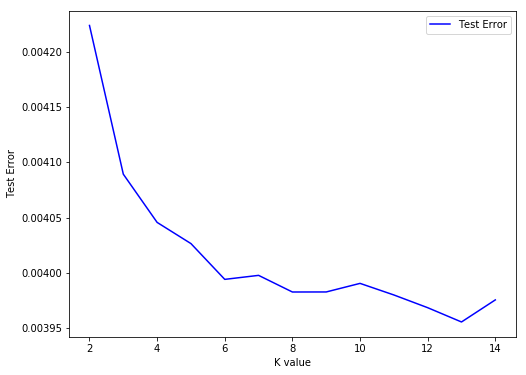

In [232]:
kval, error = main()
fig, ax = plt.subplots(figsize=(8,6))  
ax.plot(kval, error, color = "blue", label = "Test Error")
plt.xlabel("K value")
plt.ylabel("Test Error")
plt.legend()
plt.show()

In [234]:
dataset = load_preprocess_data("../Input/AdmissionDataset/data.csv")
X = dataset.iloc[:,0:-1].values
Y = dataset.iloc[:,-1].values
alpha = 0.01
iters = 1000
Lamda = 120

kf = KFold(n_splits = X.shape[0])
temp_error = []
for train_index, test_index in kf.split(X):
    X_Train, X_Val = X[train_index], X[test_index]
    Y_Train, Y_Val = Y[train_index], Y[test_index]
    theta = np.zeros(X_Train.shape[1])
    for i in range(iters):
        h = np.dot(X_Train,theta)
        gradient = np.dot(X_Train.T,(h - Y_Train)) / Y_Train.size
        theta[0] -= alpha * gradient[0]
        theta[1:] = (theta[1:] * (1 - (alpha * (Lamda/Y_Train.size)))) - (alpha * gradient[1:])
    Predicted_Output = np.dot(X_Val,theta)
    error = mean_squared_error(Predicted_Output,Y_Val)
    temp_error.append(error)
print("Test Error : ", np.mean(np.array(temp_error)))    

Test Error :  0.003973969123576061
